In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load datasets
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')


C:\Users\samar\AppData\Local\Temp\ipykernel_21232\4230875989.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_percentage.index, y=win_percentage.values, palette="viridis")


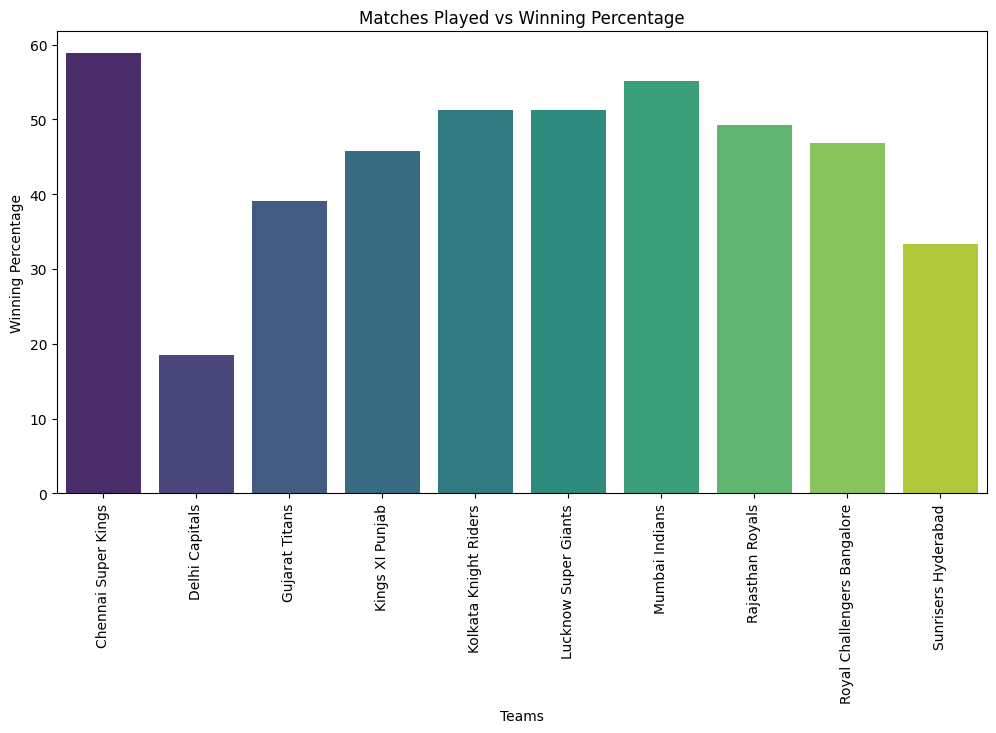

In [2]:
# Team Performance
matches['team1'] = matches['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['team2'] = matches['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

matches['team1'] = matches['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['team2'] = matches['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

matches['team1'] = matches['team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['team2'] = matches['team2'].str.replace('Gujarat Lions', 'Gujarat Titans')

allowed_teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Lucknow Super Giants',
    'Gujarat Titans'
]

matches = matches[matches['team1'].isin(allowed_teams) & matches['team2'].isin(allowed_teams)]

team_matches = matches['winner'].value_counts()
total_matches = pd.concat([matches['team1'], matches['team2']]).value_counts()

win_percentage = (team_matches / total_matches * 100).fillna(0)
win_percentage = win_percentage[win_percentage.index.isin(allowed_teams)]  # Ensure only allowed teams

plt.figure(figsize=(12,6))
sns.barplot(x=win_percentage.index, y=win_percentage.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Teams")
plt.ylabel("Winning Percentage")
plt.title("Matches Played vs Winning Percentage")
plt.show()


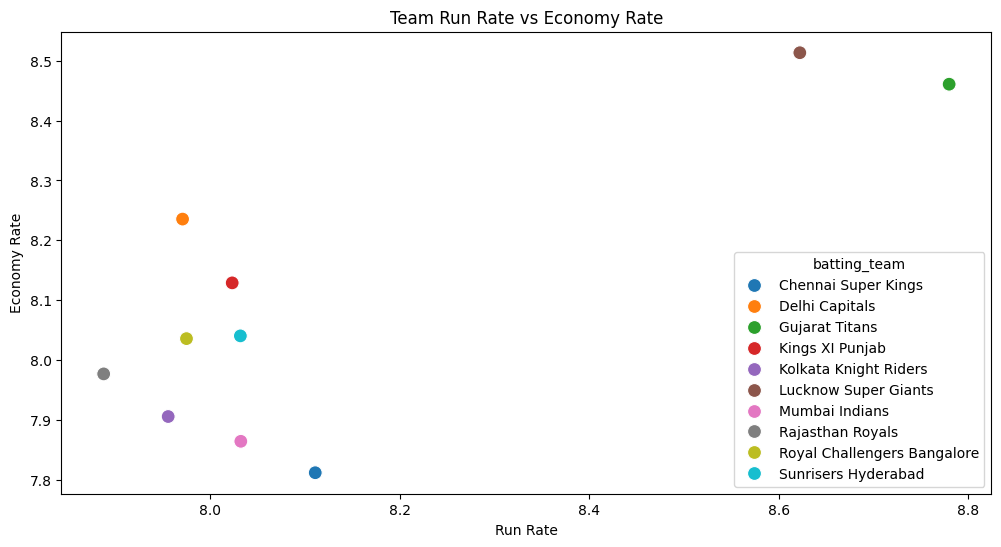

In [4]:

team_runs = deliveries.groupby('batting_team')['total_runs'].sum()
team_overs = deliveries.groupby('bowling_team')['over'].count() / 6
run_rate = team_runs / team_overs
run_rate = run_rate[run_rate.index.isin(allowed_teams)]

bowling_runs = deliveries.groupby('bowling_team')['total_runs'].sum()
economy_rate = bowling_runs / team_overs
economy_rate = economy_rate[economy_rate.index.isin(allowed_teams)]

plt.figure(figsize=(12,6))
sns.scatterplot(x=run_rate, y=economy_rate, hue=run_rate.index, palette="tab10", s=100)
plt.xlabel("Run Rate")
plt.ylabel("Economy Rate")
plt.title("Team Run Rate vs Economy Rate")
plt.show()



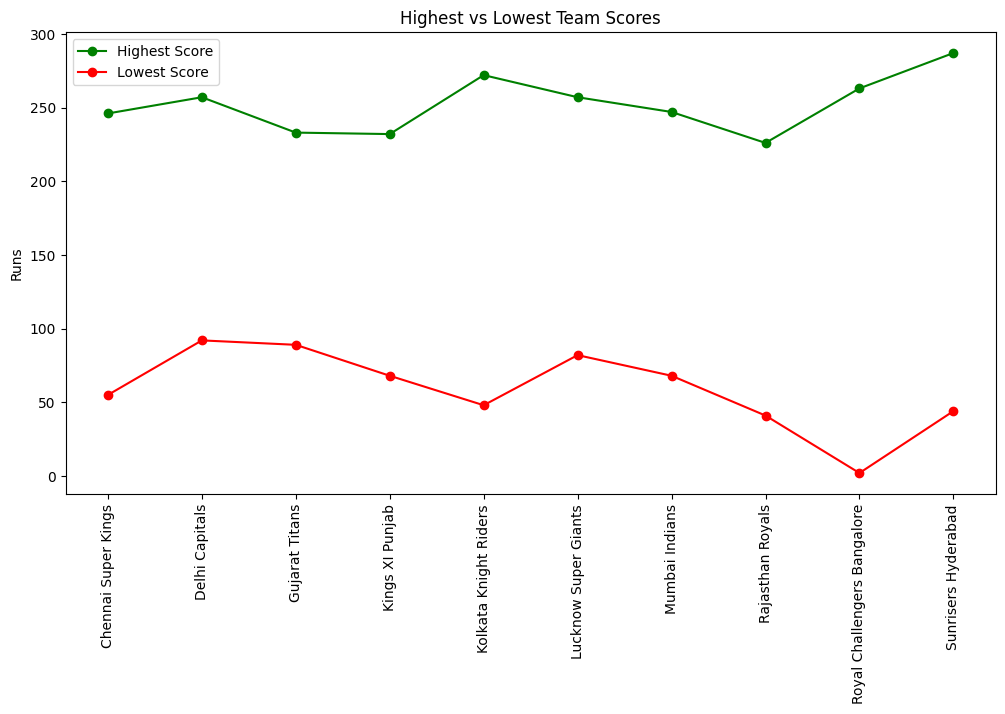

In [5]:

team_scores = deliveries.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
highest_scores = team_scores.groupby('batting_team')['total_runs'].max()
lowest_scores = team_scores.groupby('batting_team')['total_runs'].min()

highest_scores = highest_scores[highest_scores.index.isin(allowed_teams)]
lowest_scores = lowest_scores[lowest_scores.index.isin(allowed_teams)]

plt.figure(figsize=(12,6))
plt.plot(highest_scores.index, highest_scores.values, marker='o', label='Highest Score', color='green')
plt.plot(lowest_scores.index, lowest_scores.values, marker='o', label='Lowest Score', color='red')
plt.xticks(rotation=90)
plt.ylabel("Runs")
plt.legend()
plt.title("Highest vs Lowest Team Scores")
plt.show()


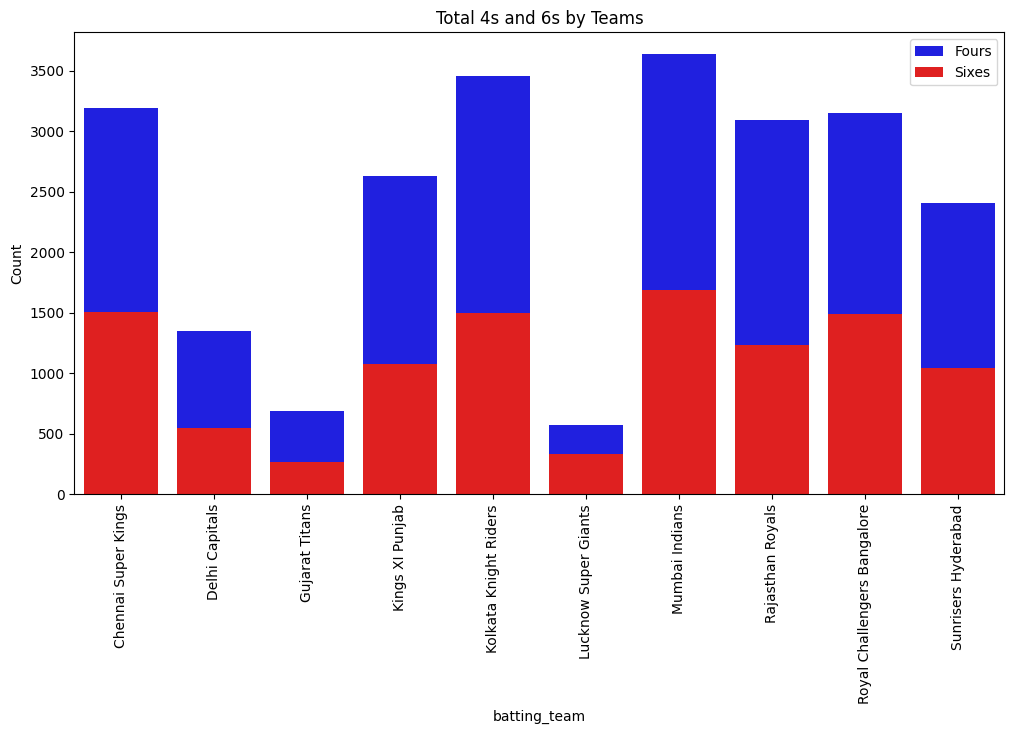

In [6]:
fours = deliveries[deliveries['batsman_runs'] == 4].groupby('batting_team').size()
sixes = deliveries[deliveries['batsman_runs'] == 6].groupby('batting_team').size()

fours = fours[fours.index.isin(allowed_teams)]
sixes = sixes[sixes.index.isin(allowed_teams)]


plt.figure(figsize=(12,6))
sns.barplot(x=fours.index, y=fours.values, color='blue', label='Fours')
sns.barplot(x=sixes.index, y=sixes.values, color='red', label='Sixes')
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.legend()
plt.title("Total 4s and 6s by Teams")
plt.show()


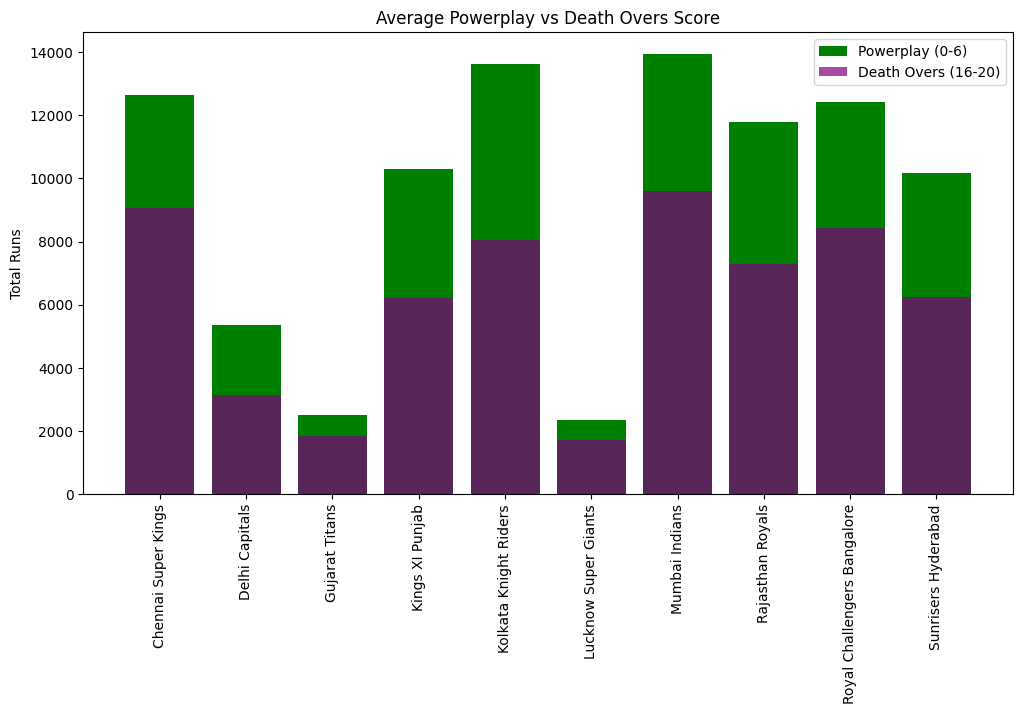

In [7]:
powerplay_scores = deliveries[(deliveries['over'] <= 6)].groupby('batting_team')['total_runs'].sum()
death_scores = deliveries[(deliveries['over'] > 15)].groupby('batting_team')['total_runs'].sum()

powerplay_scores = powerplay_scores[powerplay_scores.index.isin(allowed_teams)]
death_scores = death_scores[death_scores.index.isin(allowed_teams)]

plt.figure(figsize=(12,6))
plt.bar(powerplay_scores.index, powerplay_scores.values, label="Powerplay (0-6)", color='green')
plt.bar(death_scores.index, death_scores.values, label="Death Overs (16-20)", color='purple', alpha=0.7)
plt.xticks(rotation=90)
plt.ylabel("Total Runs")
plt.legend()
plt.title("Average Powerplay vs Death Overs Score")
plt.show()


C:\Users\samar\AppData\Local\Temp\ipykernel_21232\688126891.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scorers.index, y=top_scorers.values, palette="coolwarm")


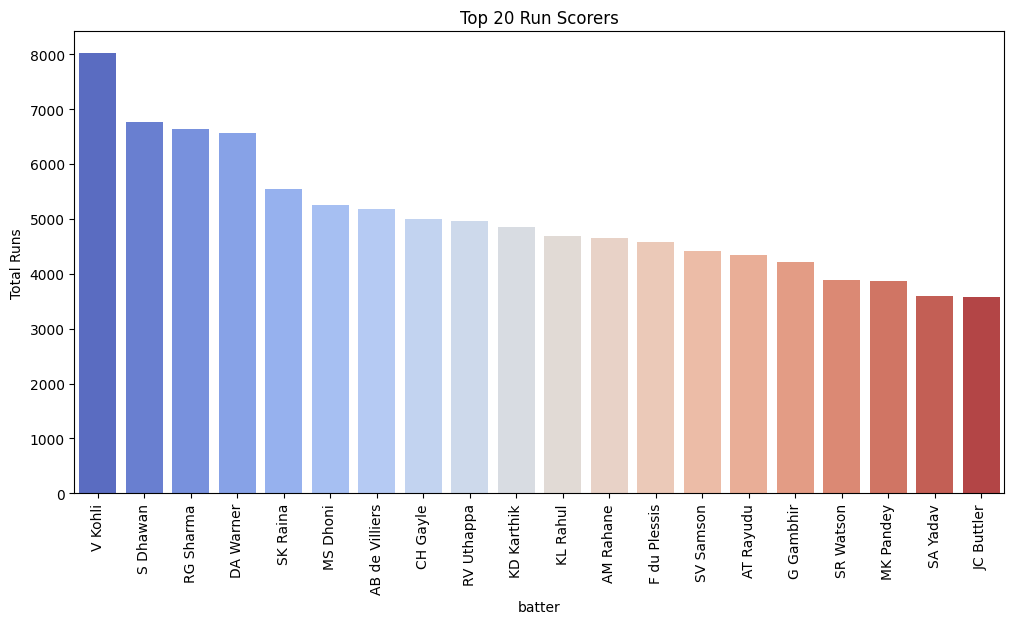

In [8]:
#Player Performance

top_scorers = deliveries.groupby('batter')['batsman_runs'].sum().nlargest(20)

plt.figure(figsize=(12,6))
sns.barplot(x=top_scorers.index, y=top_scorers.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.ylabel("Total Runs")
plt.title("Top 20 Run Scorers")
plt.show()


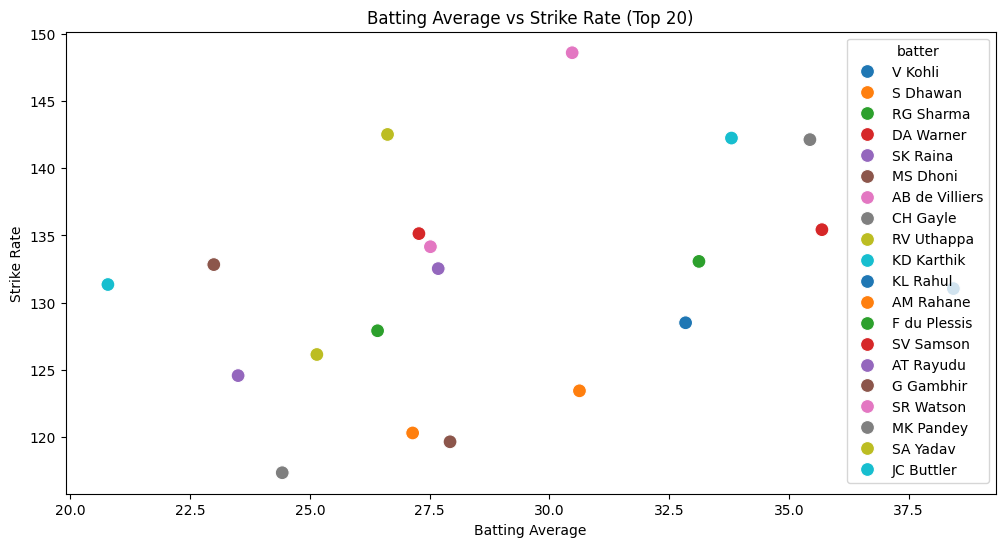

In [13]:
batsman_stats = deliveries.groupby('batter').agg({'batsman_runs': 'sum', 'ball': 'count'})
batsman_stats['strike_rate'] = (batsman_stats['batsman_runs'] / batsman_stats['ball']) * 100
batsman_stats['batting_avg'] = batsman_stats['batsman_runs'] / deliveries.groupby('batter')['match_id'].nunique()

top_20 = batsman_stats.loc[top_scorers.index]

plt.figure(figsize=(12,6))
sns.scatterplot(x=top_20['batting_avg'], y=top_20['strike_rate'], hue=top_20.index, palette="tab10", s=100)
plt.xlabel("Batting Average")
plt.ylabel("Strike Rate")
plt.title("Batting Average vs Strike Rate (Top 20)")
plt.show()


In [20]:
batsman_stats = deliveries.groupby('batter').agg({'batsman_runs': 'sum', 'ball': 'count'})

matches_played = deliveries.groupby('batter')['match_id'].nunique()

valid_batsmen = matches_played[matches_played > 50].index

batsman_stats = batsman_stats.loc[valid_batsmen]
batsman_stats['matches'] = matches_played.loc[valid_batsmen]
batsman_stats['batting_avg'] = batsman_stats['batsman_runs'] / batsman_stats['matches']
batsman_stats['strike_rate'] = (batsman_stats['batsman_runs'] / batsman_stats['ball']) * 100

highest_avg_player = batsman_stats.loc[batsman_stats['batting_avg'].idxmax()]
highest_sr_player = batsman_stats.loc[batsman_stats['strike_rate'].idxmax()]

print("🏏 Player with Highest Batting Average (Min 50 Matches):")
print(highest_avg_player[['batting_avg', 'matches']])

print("\n⚡ Player with Highest Strike Rate (Min 50 Matches):")
print(highest_sr_player[['strike_rate', 'matches']])


🏏 Player with Highest Batting Average (Min 50 Matches):
batting_avg     38.434426
matches        122.000000
Name: KL Rahul, dtype: float64

⚡ Player with Highest Strike Rate (Min 50 Matches):
strike_rate    164.224422
matches        104.000000
Name: AD Russell, dtype: float64


C:\Users\samar\AppData\Local\Temp\ipykernel_2976\1243399567.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_wickets.index, y=top_wickets.values, palette="magma")


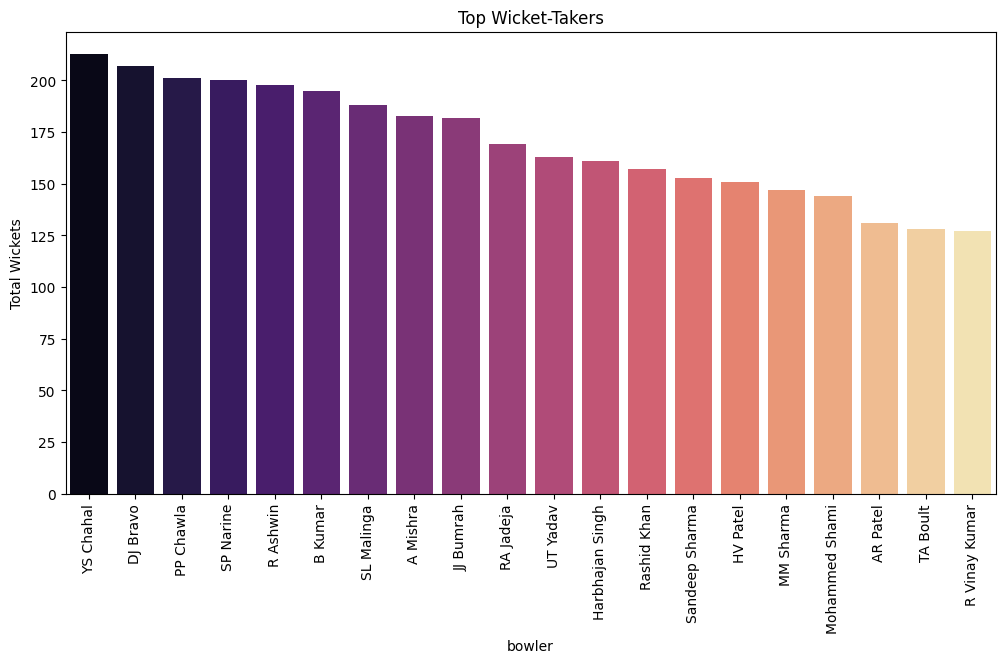

In [14]:
top_wickets = deliveries[deliveries['dismissal_kind'].notna()].groupby('bowler').size().nlargest(20)

plt.figure(figsize=(12,6))
sns.barplot(x=top_wickets.index, y=top_wickets.values, palette="magma")
plt.xticks(rotation=90)
plt.ylabel("Total Wickets")
plt.title("Top Wicket-Takers")
plt.show()


C:\Users\samar\AppData\Local\Temp\ipykernel_2976\2973895918.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=highest_individual_scores.index, y=highest_individual_scores.values, palette="coolwarm")


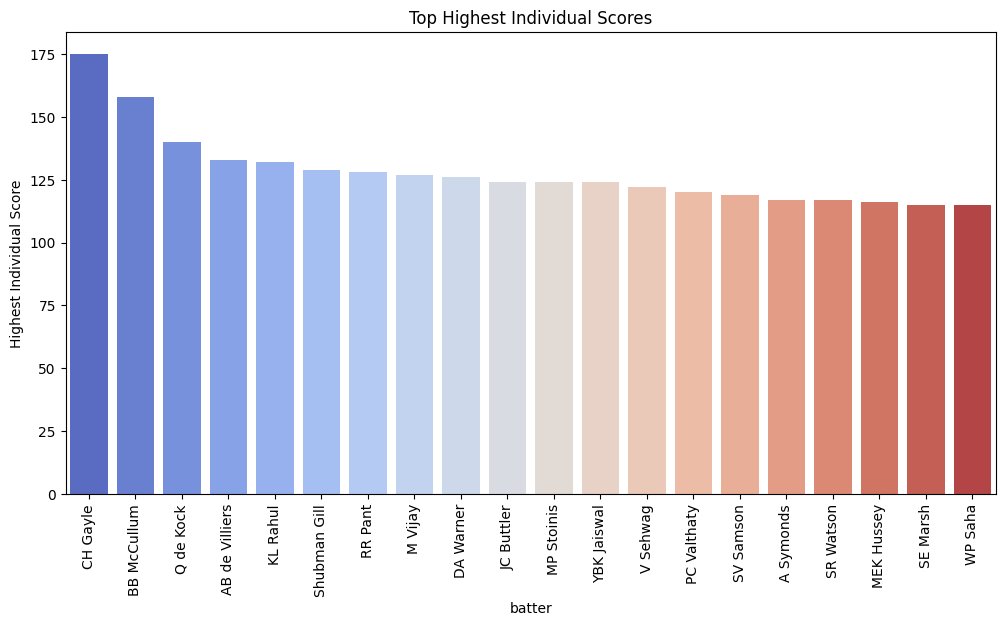

In [16]:
highest_individual_scores = deliveries.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index()
highest_individual_scores = highest_individual_scores.groupby('batter')['batsman_runs'].max().nlargest(20)

plt.figure(figsize=(12,6))
sns.barplot(x=highest_individual_scores.index, y=highest_individual_scores.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.ylabel("Highest Individual Score")
plt.title("Top Highest Individual Scores")
plt.show()


C:\Users\samar\AppData\Local\Temp\ipykernel_2976\1350147862.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mom_counts.index, y=mom_counts.values, palette="crest")


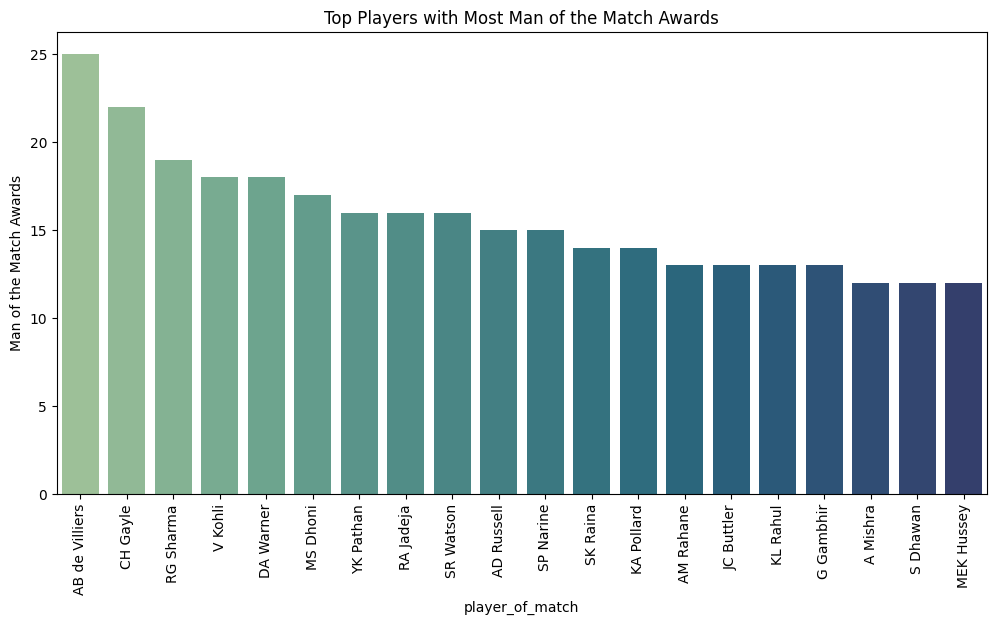

In [17]:
mom_counts = matches['player_of_match'].value_counts().nlargest(20)

plt.figure(figsize=(12,6))
sns.barplot(x=mom_counts.index, y=mom_counts.values, palette="crest")
plt.xticks(rotation=90)
plt.ylabel("Man of the Match Awards")
plt.title("Top Players with Most Man of the Match Awards")
plt.show()


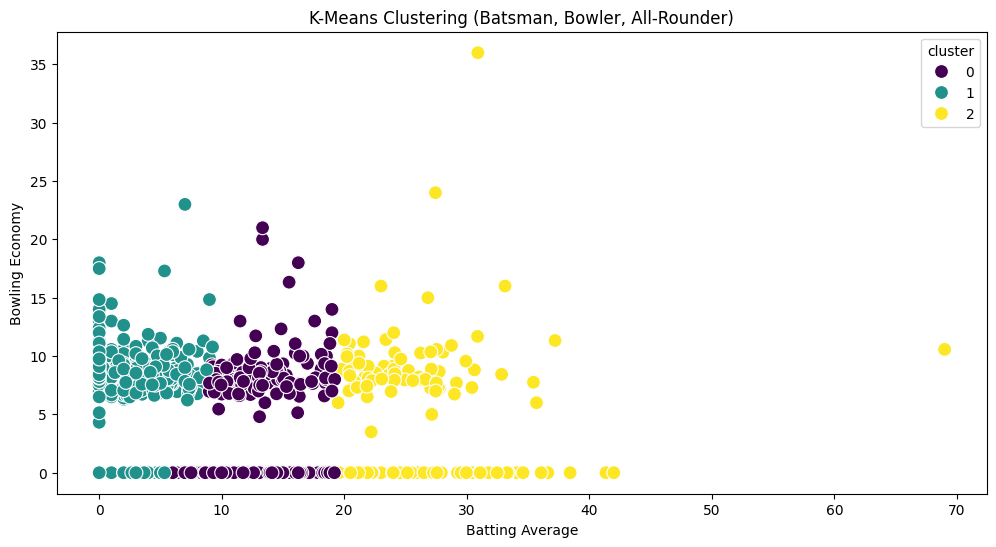

In [18]:
players = deliveries.groupby('bowler').agg({'total_runs': 'sum', 'ball': 'count'})
players['economy'] = players['total_runs'] / (players['ball'] / 6)
players = players.merge(batsman_stats, left_index=True, right_index=True, how='outer').fillna(0)

X = players[['batting_avg', 'economy']].values
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
players['cluster'] = kmeans.labels_

plt.figure(figsize=(12,6))
sns.scatterplot(x=players['batting_avg'], y=players['economy'], hue=players['cluster'], palette="viridis", s=100)
plt.xlabel("Batting Average")
plt.ylabel("Bowling Economy")
plt.title("K-Means Clustering (Batsman, Bowler, All-Rounder)")
plt.show()


C:\Users\samar\AppData\Local\Temp\ipykernel_2976\3837707391.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_six_scorers.index, y=top_six_scorers.values, palette="magma")


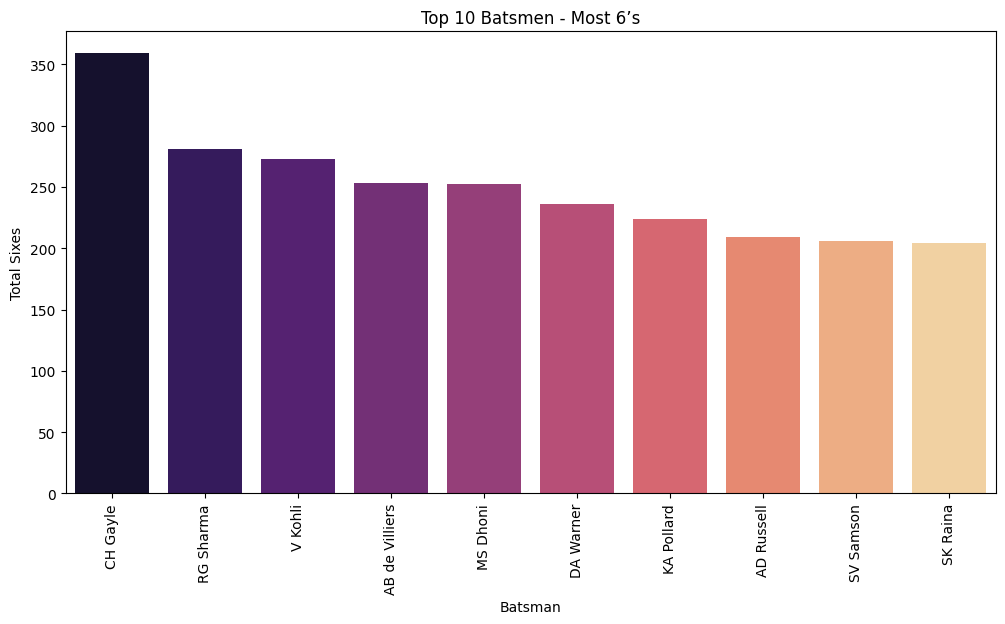

In [22]:
top_six_scorers = deliveries[deliveries['batsman_runs'] == 6].groupby('batter').size().nlargest(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_six_scorers.index, y=top_six_scorers.values, palette="magma")
plt.xlabel("Batsman")
plt.ylabel("Total Sixes")
plt.title("Top 10 Batsmen - Most 6’s")
plt.xticks(rotation=90)
plt.show()


C:\Users\samar\AppData\Local\Temp\ipykernel_2976\2451166812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_four_scorers.index, y=top_four_scorers.values, palette="coolwarm")


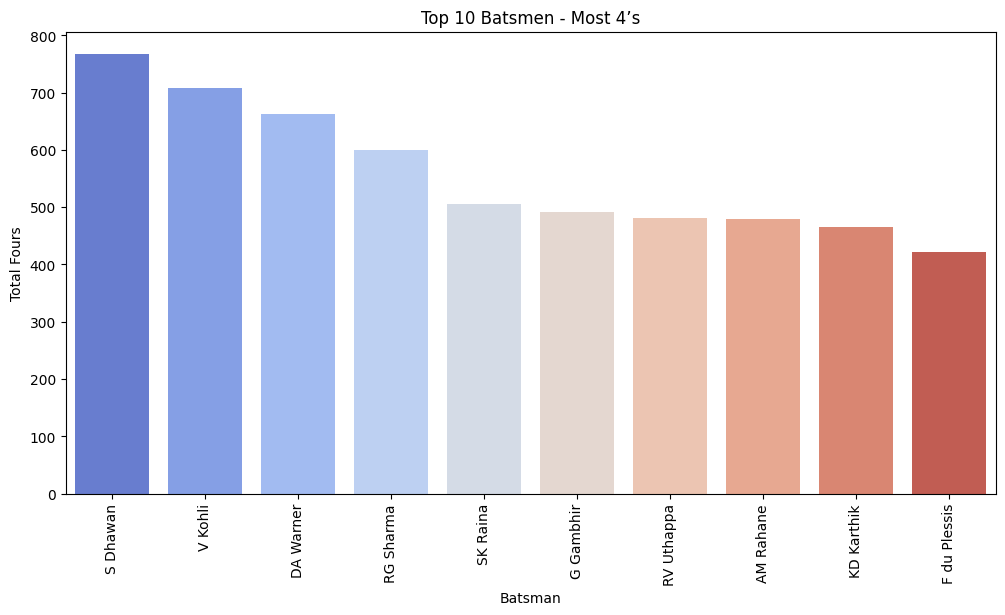

In [23]:
top_four_scorers = deliveries[deliveries['batsman_runs'] == 4].groupby('batter').size().nlargest(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_four_scorers.index, y=top_four_scorers.values, palette="coolwarm")
plt.xlabel("Batsman")
plt.ylabel("Total Fours")
plt.title("Top 10 Batsmen - Most 4’s")
plt.xticks(rotation=90)
plt.show()


C:\Users\samar\AppData\Local\Temp\ipykernel_2976\556615716.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_two_scorers.index, y=top_two_scorers.values, palette="viridis")


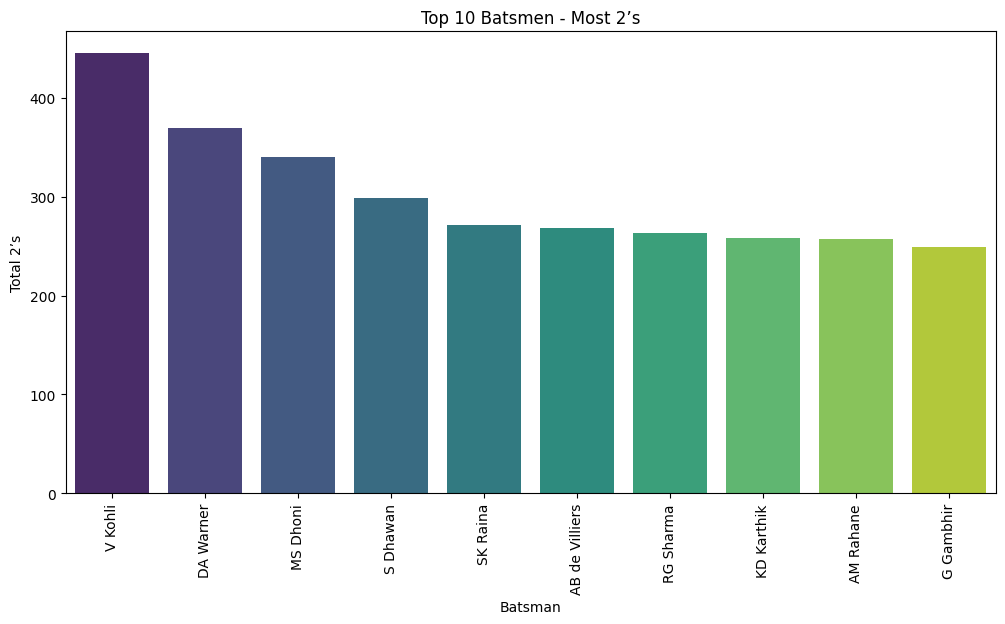

In [24]:
top_two_scorers = deliveries[deliveries['batsman_runs'] == 2].groupby('batter').size().nlargest(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_two_scorers.index, y=top_two_scorers.values, palette="viridis")
plt.xlabel("Batsman")
plt.ylabel("Total 2’s")
plt.title("Top 10 Batsmen - Most 2’s")
plt.xticks(rotation=90)
plt.show()


C:\Users\samar\AppData\Local\Temp\ipykernel_2976\3936445131.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_one_scorers.index, y=top_one_scorers.values, palette="plasma")


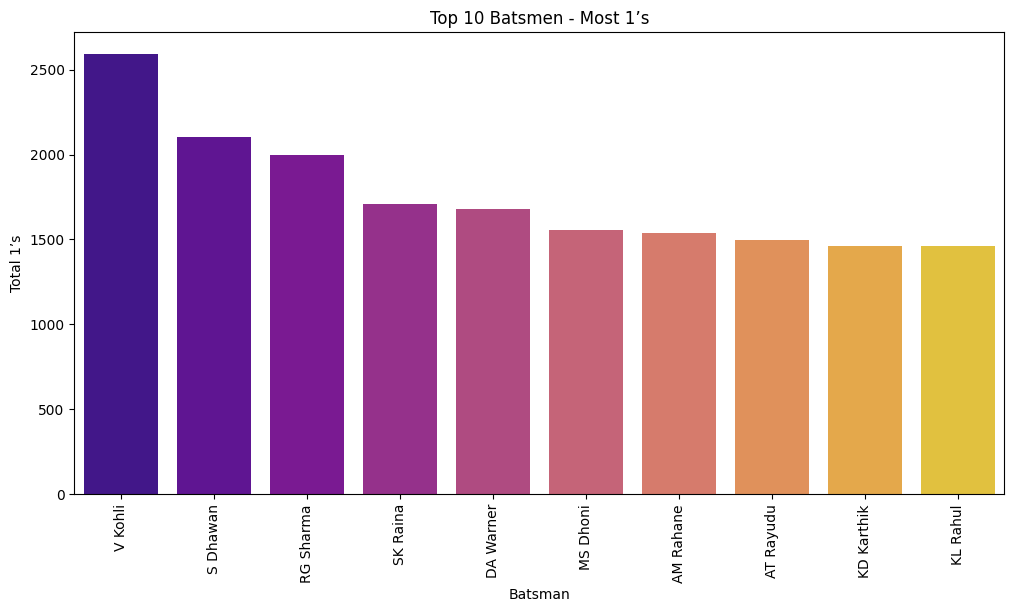

In [25]:
top_one_scorers = deliveries[deliveries['batsman_runs'] == 1].groupby('batter').size().nlargest(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_one_scorers.index, y=top_one_scorers.values, palette="plasma")
plt.xlabel("Batsman")
plt.ylabel("Total 1’s")
plt.title("Top 10 Batsmen - Most 1’s")
plt.xticks(rotation=90)
plt.show()


In [9]:
import pandas as pd

matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')
matches['team1'] = matches['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['team2'] = matches['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

matches['team1'] = matches['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['team2'] = matches['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

matches['team1'] = matches['team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['team2'] = matches['team2'].str.replace('Gujarat Lions', 'Gujarat Titans')
allowed_teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Lucknow Super Giants',
    'Gujarat Titans'
]

deliveries = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id', how='left')

total_runs_per_match = deliveries.groupby('match_id')['total_runs'].sum().reset_index()
matches = matches.merge(total_runs_per_match, left_on='id', right_on='match_id', how='left')

matches = matches[matches['team1'].isin(allowed_teams) & matches['team2'].isin(allowed_teams)]

def avg_runs_per_match_per_season():
    return matches.groupby('season')['total_runs'].sum() / matches.groupby('season').size()

def high_targets_per_season():
    return matches[matches['total_runs'] >= 200].groupby('season').size()

def avg_team_score_per_season():
    avg_scores = matches.groupby(['season', 'team1'])['total_runs'].mean().unstack()
    return avg_scores[allowed_teams] 
    
# Run calculations
print("Average runs per match per season:")
print(avg_runs_per_match_per_season())

print("\n200+ targets per season:")
print(high_targets_per_season())

print("\nAverage team score per season:")
print(avg_team_score_per_season())


Average runs per match per season:
season
2007/08    309.258621
2009       286.894737
2009/10    314.716667
2011       301.673913
2012       305.310345
2013       297.016667
2014       315.516667
2015       311.067797
2016       319.260870
2017       322.790698
2018       331.683333
2019       323.900000
2020/21    323.600000
2021       312.391304
2022       330.000000
2023       342.800000
2024       361.318182
dtype: float64

200+ targets per season:
season
2007/08    57
2009       55
2009/10    58
2011       41
2012       56
2013       58
2014       58
2015       56
2016       45
2017       40
2018       59
2019       58
2020/21    59
2021       44
2022       59
2023       59
2024       43
dtype: int64

Average team score per season:
team1    Sunrisers Hyderabad  Mumbai Indians  Royal Challengers Bangalore  \
season                                                                      
2007/08           342.000000      281.142857                   291.714286   
2009              292.

In [5]:
# Analyze runs of Orange Cap Holders per season
def orange_cap_runs_per_season():
    orange_cap = deliveries.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()
    return orange_cap.loc[orange_cap.groupby('season')['batsman_runs'].idxmax()]

# Track wickets of Purple Cap Holders per season
def purple_cap_wickets_per_season():
    valid_dismissals = deliveries[deliveries['dismissal_kind'].notnull() & (deliveries['dismissal_kind'] != 'run out')]
    purple_cap = valid_dismissals.groupby(['season', 'bowler']).size().reset_index(name='wickets')
    return purple_cap.loc[purple_cap.groupby('season')['wickets'].idxmax()]

print("\nOrange Cap Holders per season:")
print(orange_cap_runs_per_season())

print("\nPurple Cap Holders per season:")
print(purple_cap_wickets_per_season())



Orange Cap Holders per season:
       season         batter  batsman_runs
115   2007/08       SE Marsh           616
229      2009      ML Hayden           572
446   2009/10   SR Tendulkar           618
502      2011       CH Gayle           608
684      2012       CH Gayle           733
910      2013     MEK Hussey           733
1088     2014     RV Uthappa           660
1148     2015      DA Warner           562
1383     2016        V Kohli           973
1422     2017      DA Warner           641
1594     2018  KS Williamson           735
1694     2019      DA Warner           692
1866  2020/21       KL Rahul           676
2051     2021     RD Gaikwad           635
2144     2022     JC Buttler           863
2423     2023   Shubman Gill           890
2606     2024        V Kohli           741

Purple Cap Holders per season:
       season          bowler  wickets
75    2007/08   Sohail Tanvir       22
152      2009        RP Singh       23
241   2009/10         PP Ojha       21
367   

In [7]:

# Find top 10 bowlers per season based on total wickets
def top_10_bowlers_per_season():
    return deliveries[deliveries['dismissal_kind'].notnull()].groupby(['season', 'bowler']).size().reset_index(name='wickets').sort_values(['season', 'wickets'], ascending=[True, False]).groupby('season').head(10)

print("\nTop 10 bowlers per season:")
print(top_10_bowlers_per_season())



Top 10 bowlers per season:
       season          bowler  wickets
77    2007/08   Sohail Tanvir       24
30    2007/08       IK Pathan       20
32    2007/08       JA Morkel       20
70    2007/08        SK Warne       20
72    2007/08       SR Watson       20
...       ...             ...      ...
1530     2024  Arshdeep Singh       20
1544     2024    Harshit Rana       20
1566     2024        MA Starc       20
1610     2024     T Natarajan       20
1522     2024      AD Russell       19

[170 rows x 3 columns]
